In [4]:
from tools_functions import *
import pickle 
import matplotlib.pyplot as plt

(45, 51, 2282)


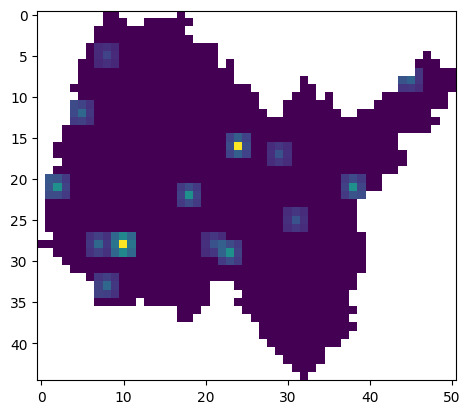

In [15]:
log = pickle.load(open('firepoint/log/departement-01-ainpastInfluence.pkl', 'rb'))
print(log.shape)
plt.imshow(log[:,:,1192])

(3, 3, 11)


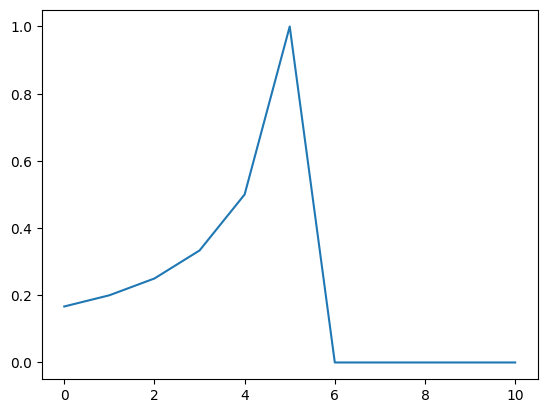

In [13]:
dim = (3,3,11)
n_pixel_x = 0.02875215641173088
n_pixel_y = 0.020721094073767096

kernel = myFunctionDistanceDugrandCercle3D(dim, resolution_lon=n_pixel_x, resolution_lat=n_pixel_y, resolution_altitude=1) + 1
kernel = 1 / kernel
kernel[:,:,(dim[2]//2) + 1:] = 0.0
print(kernel.shape)
plt.plot(kernel[1, 1])

(45, 51, 2282)


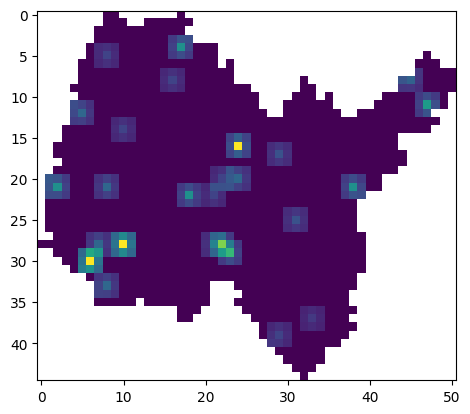

In [14]:
log = pickle.load(open('firepoint/log/departement-01-ainInfluence.pkl', 'rb'))
print(log.shape)
plt.imshow(log[:,:,1192])